# Part I - 201902-fordgobike-tripdata

## by Emenike Goodluck

## Introduction
> The Fordgo bike trip data shows the trips made by fordgo bike riders in San Francisco in February 2019. The data contains 183412 riders recorded. The dataset contains the important information about the trip such as duration in seconds, start time, stop time, start station, stop station, start and end station cordinates, member gender, bike share information and other data.

> There are some missing data in the dataset. We will do some data wrangling and cleaning before the data analysis.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline

> Here, we load the dataset.


In [2]:
dirty_df = pd.read_csv('201902-fordgobike-tripdata.csv')
dirty_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


### Assessing the data

In [3]:
# Shape of data
dirty_df.shape

(183412, 16)

In [4]:
dirty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


> Check how many values are missing

In [5]:
dirty_df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# Check for duplicated data
dirty_df.duplicated().sum()

0

In [7]:
# check data type of the columns
dirty_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

#### Identified issues
> `start_time` and `end_time` are strings. We will change them to datetime format.

> `['start_station_id','end_station_id','bike_id]` are in float, integer and data types. Convert them to object (string) data.

> `['member_gender','user_type','bike_share_for_all_trip']` are in string datatype convert them to categorical

> `member_birth_year` is in float, convert to integer

> Remove missing values

> Find the age of the participants

### Data Cleaning

> Before we clean the data, let us make a copy of the dirty data

In [8]:
# Make a copy of the data
clean_df = dirty_df.copy()

> Remove misssing data

In [9]:
clean_df.dropna(inplace = True)

In [10]:
# Shape of the new data
clean_df.shape

(174952, 16)

In [11]:
# Check if there are missing data
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


> Change `start_time` and `end_time` to datetime format.

> Convert `['start_station_id','end_station_id','bike_id]` to object data.

In [12]:
datetime_data = ['start_time','end_time']
string_data = ['start_station_id','end_station_id','bike_id']
categorical_data = ['member_gender','user_type','bike_share_for_all_trip']

In [13]:
'''
* Function that converts data types:
- This function converts a a given column to a specified datatype
- It takes the column name and the required datatype
- Returns the column's converted datatype.
''' 

def convert_data_type(column, datatype):
    clean_df[column] = clean_df[column].astype(datatype)
    return clean_df[column].dtypes

In [14]:
# Convert start_time  and end_time to datetime
for data in datetime_data:
    convert_data_type(data, 'datetime64[ns]')
# Check 
clean_df[datetime_data].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [15]:
# Convert to string
for data in string_data:
    convert_data_type(data, 'object')
# Check
clean_df[string_data].dtypes

start_station_id    object
end_station_id      object
bike_id             object
dtype: object

In [16]:
# Convert to categorical
for data in categorical_data:
    convert_data_type(data, 'category')
# Check
clean_df[categorical_data].dtypes

member_gender              category
user_type                  category
bike_share_for_all_trip    category
dtype: object

In [17]:
# Convert member_birth_year to int
convert_data_type('member_birth_year', 'int')
#Check
clean_df.member_birth_year.dtype

dtype('int64')

In [18]:
# Calculate the ages of the participants when data was collected
clean_df['member_age'] = 2019 - clean_df.member_birth_year
# Check
clean_df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47


In [19]:
'''
* Function to calculate Distance Between Two Points on Earth
- we will use it to calculate the distance between the start station and the stop station
- it takes the latitudes and longitues of the start and end stations 
- returns the calculated distance in meters.

'''
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
 
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r*1000)#distance in meters


In [20]:
# Calculate the distance between the start and end points
clean_df['distance_meters'] = distance(clean_df.start_station_latitude, clean_df.end_station_latitude, 
         clean_df.start_station_longitude, clean_df.end_station_longitude)

In [21]:
# Calculate the speed of the bikers
clean_df['speed_mps'] = clean_df.distance_meters/clean_df.duration_sec

In [22]:
clean_df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,distance_meters,speed_mps
105620,648,2019-02-13 21:59:03.501,2019-02-13 22:09:52.265,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,129,Harrison St at 20th St,37.758862,-122.412544,6518,Subscriber,1983,Male,No,36,2470.843703,3.813030
132548,4695,2019-02-08 23:22:07.389,2019-02-09 00:40:22.684,149,Emeryville Town Hall,37.831275,-122.285633,149,Emeryville Town Hall,37.831275,-122.285633,3475,Customer,1988,Male,No,31,0.000000,0.000000
92845,686,2019-02-15 18:14:48.620,2019-02-15 18:26:15.324,176,MacArthur BART Station,37.828410,-122.266315,213,32nd St at Adeline St,37.823847,-122.281193,5508,Customer,1992,Female,No,27,1401.764598,2.043389
152504,1340,2019-02-06 15:23:07.127,2019-02-06 15:45:27.902,250,North Berkeley BART Station,37.873558,-122.283093,154,Doyle St at 59th St,37.841924,-122.288045,4559,Subscriber,1984,Male,Yes,35,3544.327882,2.645021
136771,670,2019-02-08 09:16:46.797,2019-02-08 09:27:57.666,263,Channing Way at San Pablo Ave,37.862827,-122.290230,258,University Ave at Oxford St,37.872355,-122.266447,5135,Subscriber,1995,Male,No,24,2341.218426,3.494356


> Since we have calculated the distance and speed of the riders, we can drop the location coordinates

In [23]:
# Remove these columns
columns_to_be_dropped = ['start_station_latitude','start_station_longitude','end_station_latitude',
                         'end_station_longitude','member_birth_year']
clean_df.drop(columns=columns_to_be_dropped,inplace=True)

In [24]:
# Check all data types
clean_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
end_station_id                     object
end_station_name                   object
bike_id                            object
user_type                        category
member_gender                    category
bike_share_for_all_trip          category
member_age                          int64
distance_meters                   float64
speed_mps                         float64
dtype: object

In [25]:
clean_df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,distance_meters,speed_mps
81210,1927,2019-02-18 13:23:54.324,2019-02-18 13:56:02.201,52,McAllister St at Baker St,377,Fell St at Stanyan St,5814,Customer,Female,No,33,1209.007816,0.627404
138409,316,2019-02-08 07:37:29.749,2019-02-08 07:42:45.847,223,16th St Mission BART Station 2,100,Bryant St at 15th St,1101,Subscriber,Male,No,33,868.550583,2.748578
36589,293,2019-02-23 15:51:15.539,2019-02-23 15:56:08.544,256,Hearst Ave at Euclid Ave,254,Vine St at Shattuck Ave,5802,Customer,Female,No,41,975.884623,3.330664
141682,160,2019-02-07 17:52:25.332,2019-02-07 17:55:05.876,245,Downtown Berkeley BART,247,Fulton St at Bancroft Way,4661,Subscriber,Male,No,36,342.664491,2.141653
161037,1760,2019-02-05 15:46:37.557,2019-02-05 16:15:58.047,42,San Francisco City Hall (Polk St at Grove St),59,S Van Ness Ave at Market St,2177,Subscriber,Male,Yes,51,431.263883,0.245036
8901,879,2019-02-28 07:51:07.950,2019-02-28 08:05:47.281,81,Berry St at 4th St,42,San Francisco City Hall (Polk St at Grove St),4960,Subscriber,Female,No,35,2223.912734,2.530049
151037,1712,2019-02-06 17:17:01.659,2019-02-06 17:45:33.785,338,13th St at Franklin St,188,Dover St at 57th St,4579,Subscriber,Male,No,28,4392.669659,2.565812
45850,5340,2019-02-22 09:46:01.013,2019-02-22 11:15:01.214,5,Powell St BART Station (Market St at 5th St),380,Masonic Ave at Turk St,6253,Subscriber,Male,No,24,3456.331318,0.647253
64866,363,2019-02-20 10:47:40.888,2019-02-20 10:53:44.230,20,Mechanics Monument Plaza (Market St at Bush St),20,Mechanics Monument Plaza (Market St at Bush St),5262,Subscriber,Male,No,40,0.000000,0.000000
168088,441,2019-02-04 16:15:17.792,2019-02-04 16:22:39.391,24,Spear St at Folsom St,67,San Francisco Caltrain Station 2 (Townsend St...,5047,Subscriber,Male,No,41,1517.348422,3.440699


In [26]:
clean_df.shape

(174952, 14)

### What is the structure of your dataset?

> There are 183412 riders recorded in this dataset with 17 columns. After cleaning the dataset and we will be analyzing 174952 riders which represent 95% of the original dataset. 

> The users are categorized as either `customer` or `subscriber`

> Three genders participated `male`, `female` and `other` and some participants shared their rides during the trip

### What is/are the main feature(s) of interest in your dataset?

> I am interested in knowing the time (period) when riders usually take a ride, how long an average trip take and how the trip is affected based on the user type, age and gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start time, duration_sec, birth_year, and bike_share_for_all_trip are the features that will help me support my investigation

In this exploration, I will use the following convenctions to differentiate sections

- Sections under `univariate exploration` will the preceeded with the letter U
- Sections under `bivariate exploration` will the preceeded with the letter B
- Sections under `multivariate exploration` will the preceeded with the letter M

## Univariate Exploration

> In this section, we will investigate distributions of individual variables. If we see unusual points or outliers, we will take a deeper look to clean things up and prepare ourselves to look at relationships between variables.


> Before we start our exploration, let us copy the clean dataframe to a dataframe called `df`

In [27]:
df = clean_df.copy()

> Let us check the summary of the data and the datatypes

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
end_station_id             174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null category
member_age                 174952 non-null int64
distance_meters            174952 non-null float64
speed_mps                  174952 non-null float64
dtypes: category(3), datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 16.5+ MB


##### U1.1: Which stations did many of the riders take off from?

In [29]:
df.start_station_name.value_counts().head()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

> Many of the riders started their trip from `Market St at 10th St`, `San Francisco Caltrain Station 2  (Townsend St at 4th St)`, and `Berry St at 4th St`


##### U1.2: Which stations did many of the riders end their ride?

In [30]:
df.end_station_name.value_counts().head()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Name: end_station_name, dtype: int64

> The top 4 stations that the riders ended their trip are `San Francisco Caltrain Station 2  (Townsend St at 4th St)`, `Market St at 10th St`, `Montgomery St BART Station (Market St at 2nd St)`, and `San Francisco Ferry Building (Harry Bridges Plaza)`

> We can see that some riders started and stopped at the same station. Remember that we calculated the distance travelled by the riders from the coordinates of the start and end stations. This means that some of the distances that we calculated will be `0`. Does this mean that all the riders that started in these stations ended there as well? Before we answer these questions, let us define some variables and functions that will help us in our visualizations.

In [31]:
numeric_vars = ['duration_sec','member_age','distance_meters','speed_mps']
categoric_vars = ['user_type','member_gender','bike_share_for_all_trip']

> Let us write a few functions to help us in the plotting

In [32]:
# Function that plots a bar chart
def plot_bar(column_name):
    default_color = sb.color_palette()[0]
    sb.countplot(data = df, x = column_name, color = default_color)
    plt.show()

In [33]:
# Function that plots a histogram
def plot_hist(binsize,column_name):
    bin_size = binsize
    bins = np.arange(0, df[column_name].max()+bin_size, bin_size)

    plt.figure(figsize=[8, 5])
    df[column_name].hist(bins = bins)
    plt.xlabel(column_name)
    plt.show()

In [34]:
# Function that plots a pie chart
def plot_pie(column_name):
    column = df[column_name].value_counts()
    plt.pie(column, labels = column.index, startangle = 90, 
            counterclock = False,autopct='%.0f%%');
    plt.axis('square');
    plt.xlabel(column_name)

In [35]:
# Function that labels a chart
def label_chart(x_label,y_label,title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

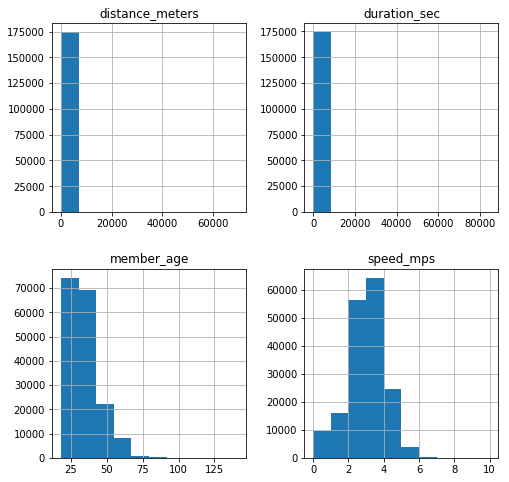

In [36]:
# Check the distribution of the numeric data
df.hist(figsize=(8,8));

Now, let us examine how the riders started and stopped their rides. We have claimed that some riders will travel a distance of zero. This means that their speed will be zero as well
> Let us start by examining the distribution of the speed

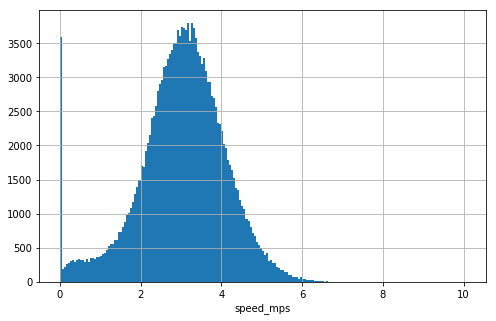

In [37]:
# Histogram of the speed
plot_hist(0.05, 'speed_mps')

> We can see that the distribution of the speed is a bell shape which depicts a normal distribution. However, some users travelled at a speed of `0` as we predicted. 

> Does this mean that they did not move? Let us check users whose speed are zero.

In [38]:
zero_speed = df.query('speed_mps == 0')
zero_speed

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,distance_meters,speed_mps
19,874,2019-02-28 23:43:05.183,2019-02-28 23:57:39.796,180,Telegraph Ave at 23rd St,180,Telegraph Ave at 23rd St,5629,Customer,Male,No,41,0.0,0.0
27,408,2019-02-28 23:48:08.282,2019-02-28 23:54:56.930,78,Folsom St at 9th St,78,Folsom St at 9th St,5410,Subscriber,Male,No,37,0.0,0.0
34,471,2019-02-28 23:42:43.361,2019-02-28 23:50:34.446,133,Valencia St at 22nd St,133,Valencia St at 22nd St,5559,Subscriber,Male,No,27,0.0,0.0
55,3478,2019-02-28 22:39:35.020,2019-02-28 23:37:33.342,11,Davis St at Jackson St,11,Davis St at Jackson St,1846,Subscriber,Male,No,24,0.0,0.0
56,3140,2019-02-28 22:44:53.503,2019-02-28 23:37:14.090,11,Davis St at Jackson St,11,Davis St at Jackson St,3040,Subscriber,Female,No,36,0.0,0.0
59,422,2019-02-28 23:28:50.464,2019-02-28 23:35:52.552,240,Haste St at Telegraph Ave,240,Haste St at Telegraph Ave,5649,Subscriber,Male,Yes,22,0.0,0.0
60,401,2019-02-28 23:28:53.508,2019-02-28 23:35:34.926,240,Haste St at Telegraph Ave,240,Haste St at Telegraph Ave,4531,Subscriber,Female,Yes,22,0.0,0.0
72,113,2019-02-28 23:26:28.335,2019-02-28 23:28:21.625,163,Lake Merritt BART Station,163,Lake Merritt BART Station,5414,Subscriber,Male,No,44,0.0,0.0
74,371,2019-02-28 23:21:37.878,2019-02-28 23:27:48.979,369,Hyde St at Post St,369,Hyde St at Post St,6404,Subscriber,Male,No,29,0.0,0.0
75,3001,2019-02-28 22:37:41.470,2019-02-28 23:27:43.363,159,24th St at Market St,159,24th St at Market St,5471,Subscriber,Female,Yes,21,0.0,0.0


> As we can see, these customers moved as seen from the duration of their ride. These customers started and ended in the same station. What happened? Does it mean that every customer who used these stations ended there as well? We will explore this further as we proceed. Right now, let us get the customers who started and stopped at different stations.

In [39]:
# Customers who started and ended in same stations
same_station = zero_speed.copy()
same_station.shape

(3458, 14)

In [40]:
# Customers who started and ended in different stations
different_stations = df.drop(same_station.index)
print(different_stations.shape)
different_stations

(171494, 14)


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,distance_meters,speed_mps
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,No,35,544.708503,0.010438
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47,2704.545131,0.043725
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,No,30,260.738544,0.007145
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45,2409.301416,1.520064
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,60,3332.202628,1.858451
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,312,San Jose Diridon Station,3803,Subscriber,Female,No,36,2028.551185,1.768571
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,127,Valencia St at 21st St,6329,Subscriber,Male,No,30,4532.568298,2.806544
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,127,Valencia St at 21st St,6548,Subscriber,Other,No,31,4532.568298,2.886986
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19,Post St at Kearny St,121,Mission Playground,6488,Subscriber,Male,No,27,3664.101171,3.492947
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370,Jones St at Post St,43,San Francisco Public Library (Grove St at Hyde...,5318,Subscriber,Female,Yes,23,979.824334,2.139354


> Now that we have gotten the riders that started and ended in the same station as well as riders that started and ended in different dtations, let us check if it is `every customer` that started in the `same_station` stations ended there as well.

In [41]:
# Check for the stations
sample_stations = same_station.start_station_id.sample(5).values
for station_id in sample_stations:
    query_string = 'start_station_id == ' + str(station_id)
    print("\nStart_station_id: ",station_id,different_stations.query(query_string).start_station_name.value_counts())


Start_station_id:  239.0 Bancroft Way at Telegraph Ave    1706
Name: start_station_name, dtype: int64

Start_station_id:  19.0 Post St at Kearny St    1293
Name: start_station_name, dtype: int64

Start_station_id:  81.0 Berry St at 4th St    2902
Name: start_station_name, dtype: int64

Start_station_id:  160.0 West Oakland BART Station    787
Name: start_station_name, dtype: int64

Start_station_id:  251.0 California St at University Ave    286
Name: start_station_name, dtype: int64


> As we saw from the analysis, some participants that stopped at a different station also started in the same station as those who stated and ended in the same station. Therefore, not all participants who stated in the identified `same_stations` ended in the same station. 

> Since some participants ended in the same station that they started, distance travelled is not a good measure in this data as it was calculated using the coordinates of the stations. Therefore, going forward, we will use the duration of the trip in our analysis instead of the distance travelled as calculated in this data

##### U2:  How old are the participants?

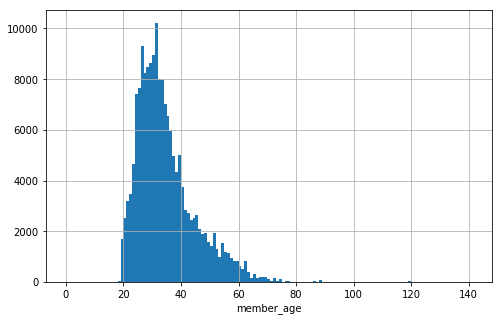

In [42]:
# let's start by looking at the distribution of the participants' ages
plot_hist(1,'member_age')

> We see that most of the participants are between 20 years old and 80 years old. There are participants aged above 80. These are outliers and we will remove them. 

In [43]:
# How old is the oldest participant?
df.member_age.max()

141

> we can see that the oldest person in this dataset is `141` years old. The oldest person recorded was [Jeanne Calment](https://en.wikipedia.org/wiki/Jeanne_Calment) who lived `122` years.

> Now, let us remove the participants that are above 80 years old

In [44]:
# Get the ages above 80
ages_above_80 = df.query('member_age > 80')
ages_above_80.shape

(192, 14)

Removing `192` entries will not impact much on our analysis

In [45]:
# Drop these ages
df.drop(ages_above_80.index,inplace=True)

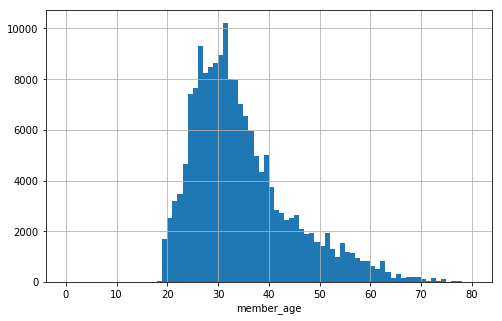

In [46]:
# Check the distribution again
plot_hist(1,'member_age')

In [47]:
# What is the min and max participant age?
print('Minimum participant age: ',df.member_age.min())
print('Maximum participant age: ',df.member_age.max())

Minimum participant age:  18
Maximum participant age:  80


> From our analysis, *the participants are between the ages of 18 and 80*. However, from the histograms, we can see that <b>most of the participants are between 25 and 35 years old

##### U3: What is the distribution of the gender of the participants?

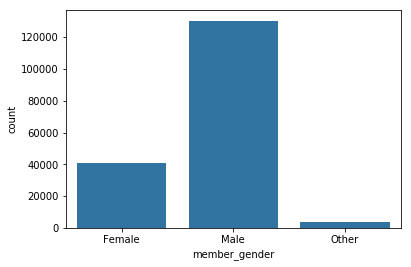

In [48]:
# let's check the distribution of the gender using a bar chat

plot_bar('member_gender')

> Majority of the participants are male. How much percentage does this represent?


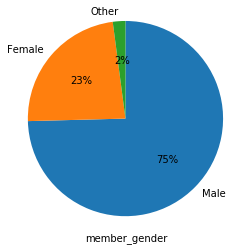

In [49]:
plot_pie('member_gender')

> `75%` of the participants are male, `23%` are females, while `2%` are other gender identities

##### U4: What is the distribution of the customer categories


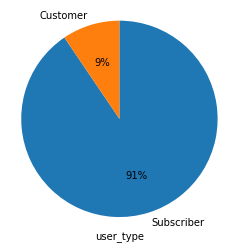

In [50]:
plot_pie('user_type')

> <b>Most of the users are subscribers

##### U5: What percentage of the participants shared their rides?

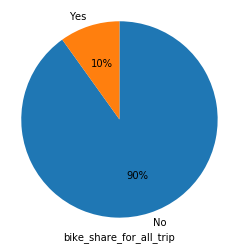

In [51]:
# Pie chat of the participants that shared their rides
plot_pie('bike_share_for_all_trip')

> <b>`10%` of the participants shared their rides throughout the trip

> We can see something interesting here. `9%` of the participants are `customers` and `10%` of the participants `shared their rides`. **Does this mean that all the customers shared their rides?** We will answer this question in future.

##### U6: How long does the average trip take?

In [52]:
# Describe the duration of the trip
df.duration_sec.describe()

count    174760.000000
mean        704.309630
std        1643.031657
min          61.000000
25%         323.000000
50%         511.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

> <b> An average trip takes `704 seconds`.
    
> Does the duration of the trip depend on whether the participant is a customer or a subscriber?

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From my plots, I found out that most of the participants are between the ages of 25 and 35. Most of the participants are `male` which represents `75%` of the data. Of all the participants, most are `subscribers` while `10%` of the participants shared their rides throughout the trip and an average trip takes about `704 seconds`

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I found that the `age` distribution was unusual. I had few participants who are above 80 years which I classified as outliers. In fact, one of the participants was 141 years old. I removed these participants who were above 80 years old because they caused the age distribution to be abnormally skewed.

## Bivariate Exploration

> In this section, we will investigate relationships between pairs of variables in our data. 

> First, let us create some functions to help us in the plotting

In [53]:
'''
- This function produces a bivariate plot using the matplotlib.pyplot library
- It takes the plot type, x_data, and y_data. Then it plots the specified plot
'''
def plot_bivariate(plot_type, x_data,y_data):
    df.plot(kind = plot_type, x = x_data, y = y_data);
    plt.xlabel(x_data)
    plt.ylabel(y_data)

##### B1: What is the relationship between duration of the journey and the age of the participant?

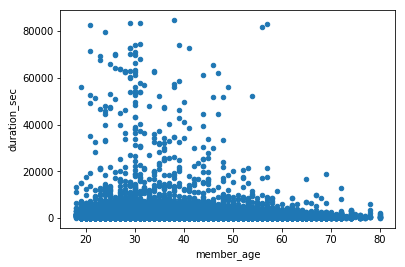

In [54]:
plot_bivariate('scatter', 'member_age','duration_sec');

> As I am looking at this plotting, it looks as if there is no correlation between participant's age and duration. However, let us introduce some transparency to this plotting to confirm this


Text(0,0.5,'Duration')

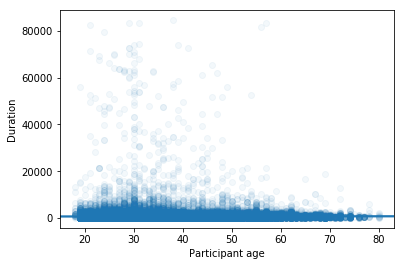

In [55]:
# Introduce transparency in the plot
sb.regplot(data = df, x = 'member_age', y = 'duration_sec',
           scatter_kws={'alpha':1/20});
plt.xlabel('Participant age')
plt.ylabel('Duration')

> **We can now see that there is no correlation between member age and the duration of the trip.**


##### B2: How is the gender distributed among the different user types?

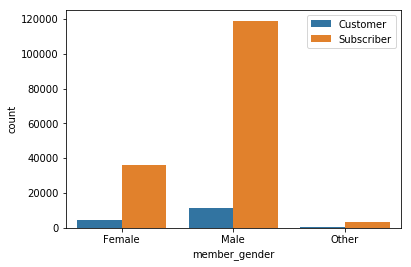

In [56]:
# Countplot of the member gender and user type
sb.countplot(data = df, x = 'member_gender', hue = 'user_type')
plt.legend(loc='best')

> Greater percentage of each gender are subscribers

##### B3: What is the relationship between gender and bike share?

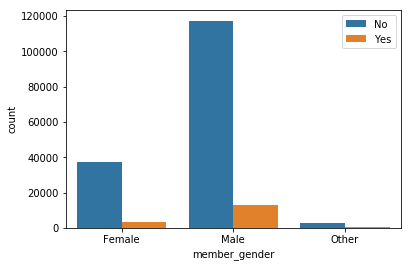

In [57]:
# Count plot of the member gender and bike_share_for_all_trip
sb.countplot(data = df, x = 'member_gender', hue = 'bike_share_for_all_trip')
plt.legend(loc='best')

> Greater number of all the genders did not share their rides

##### B4: What is the relationship between user type and bike sharing?

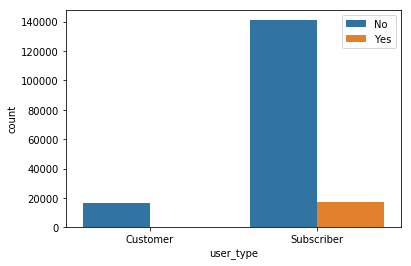

In [58]:
# Count plot of the user_type and bike_share_for_all_trip
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.legend(loc='best')

It seems that no customer shared their bikes. Let us verify this by using a heat map.

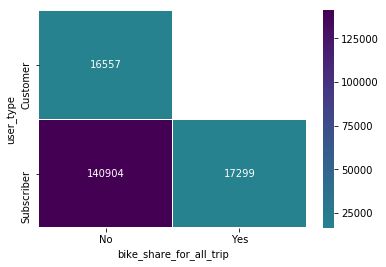

In [59]:
# Generate a heatmap of the user type and bike share
user_bike_share = df.groupby(['user_type','bike_share_for_all_trip'],sort=False).size()
user_bike_share = user_bike_share.reset_index(name = 'count')
user_bike_share = user_bike_share.pivot(index = 'user_type', columns = 'bike_share_for_all_trip', values = 'count')
sb.heatmap(user_bike_share,annot = True,cmap = 'viridis_r', center = 0, linewidth=.1,fmt='.0f');

> Interesting! In section U5, we asked this question: Does this mean that all the customers shared their rides? From this analysis, we see that it is the other way round. **None of the customers shared their rides**. All the participants that shared their rides are subscribers.

##### B5: What are the relationships between numerical and categorical variables?

df.shape= (174760, 14)
sample_df.shape= (20000, 14)


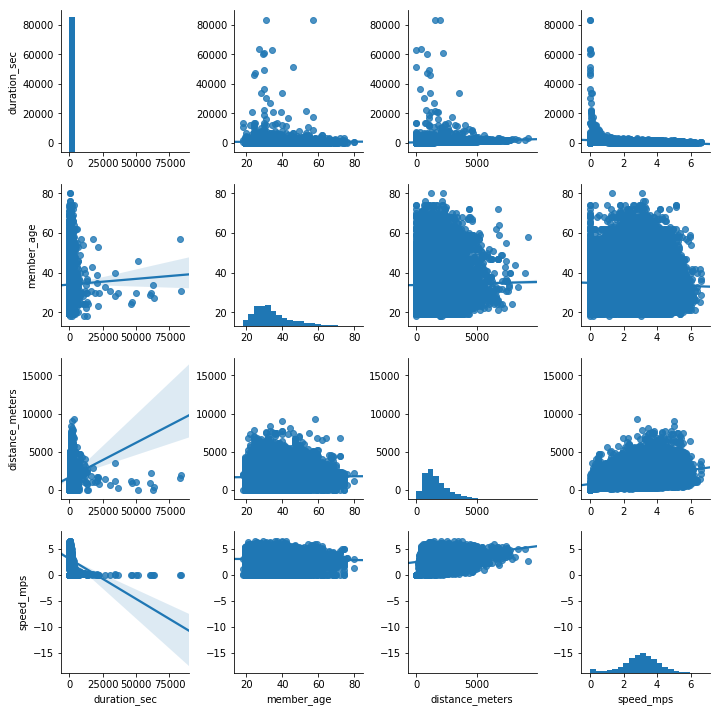

In [60]:
# plot matrix of numeric features.
print("df.shape=",df.shape)
sample_df = df.sample(n=20000, replace = False)
print("sample_df.shape=",sample_df.shape)

g = sb.PairGrid(data = sample_df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(sb.regplot)

As seen from the plot, there is no correlation between duration and the member age. As expected, distance has a positive correlation with duration. This is expected as the farther you travel, the longer it takes. Also, speed has a negative correlation with duration. This is also expected as the fater you travel, the lesser the time it takes for one to complete the journey. Of all the variables, `member_age` has no correlation with either duration, distance travelled or speed of the participant.

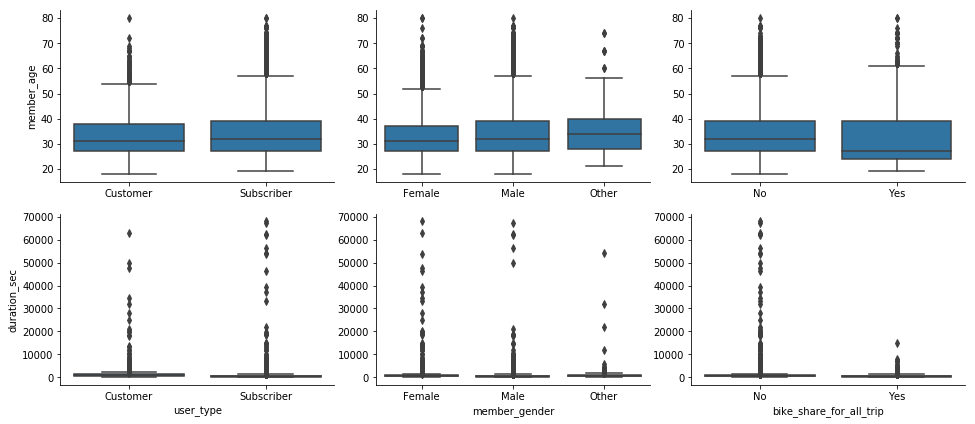

In [61]:
# plot matrix of numeric features against categorical features.
sample_df = df.sample(n=20000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = sample_df, y_vars = ['member_age', 'duration_sec'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

In terms of user type and age, both subscribers and customers have an average age of about 34 years old. Males and Females have an average age of about 32 years old while the `other` gender have an average age of about 35 years old. Younger participants shared their rides more than the older ones as the average age of participants that shared their rides is about 28 years.

There are outliers in the `duration_sec`. We have to remove these outliers and sample the data. Let us repeat the plot again

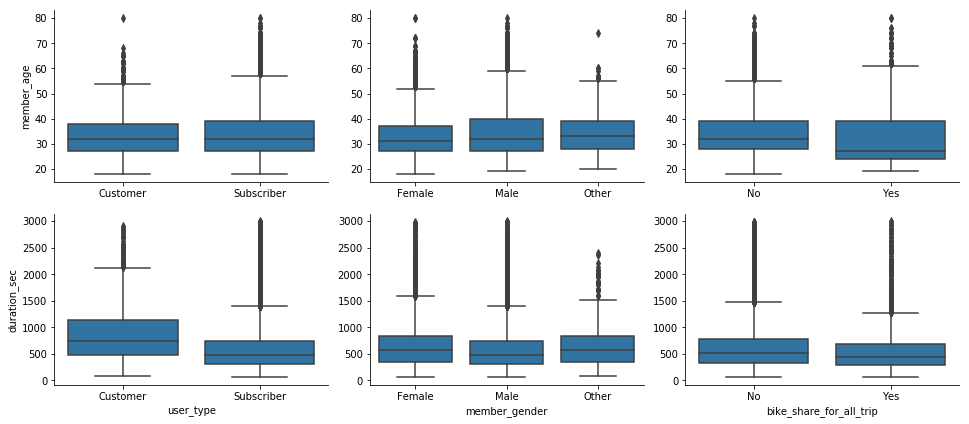

In [62]:
# plot matrix of numeric features against categorical features.
sample_df = df.query('duration_sec<3000').sample(n=20000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = sample_df, y_vars = ['member_age', 'duration_sec'], 
                x_vars = categoric_vars,size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Those who did not share their rides travelled for a longer period than those who shared their rides

Secondly, we see that customers travelled for a longer time more than subscribers. This may be beccause none of the customers shared their rides. Although only 10% of the participants shared their rides, many of the subscribers travelled a shorter distance.

Lastly, Females and the other gender travelled longer than male gender. This is because the male gender shared their rides the most.



##### B6: When was most trips taken in terms of time of day, day of the week, or month of the year?

> First, let us determine the period of time the trips were made

In [63]:
# When was the trip taken?
hour = df.start_time.dt.hour
day = df.start_time.dt.day
day_name = df.start_time.dt.day_name()
month = df.start_time.dt.month_name()
year = df.start_time.dt.year
print('\nHour\n',hour.value_counts())
print('\nDay\n',day.value_counts())
print('\nDay_name\n',day_name.value_counts())
print('\nMonth\n',month.value_counts())
print('\nYear\n',year.value_counts())


Hour
 17    20893
8     20218
18    16103
9     15194
16    13452
7     10226
19     9418
15     8618
12     8207
13     8072
10     7962
14     7654
11     7451
20     6210
21     4399
6      3289
22     2793
23     1572
0       892
5       866
1       525
2       355
4       227
3       164
Name: start_time, dtype: int64

Day
 28    9444
20    9227
21    9112
19    9092
7     8793
22    8738
6     8649
11    8309
12    8148
5     8131
27    7445
15    6970
25    6736
14    6342
8     6092
1     5821
18    5272
4     5271
26    5191
23    5125
24    4225
17    3865
16    3733
10    3696
13    3075
2     3003
3     2706
9     2549
Name: start_time, dtype: int64

Day_name
 Thursday     33691
Tuesday      30562
Wednesday    28396
Friday       27621
Monday       25588
Sunday       14492
Saturday     14410
Name: start_time, dtype: int64

Month
 February    174760
Name: start_time, dtype: int64

Year
 2019    174760
Name: start_time, dtype: int64


> From the analysis above, all the trip was made in `February 2019`. Let us add the Day and the Time to the pandas dataframe

In [64]:
# Add the extracted periods to the dataframe
df['day'] = day
df['day_name'] = day_name
df['hour'] = hour
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,distance_meters,speed_mps,day,day_name,hour
91419,297,2019-02-16 08:40:57.417,2019-02-16 08:45:55.098,118,Eureka Valley Recreation Center,121,Mission Playground,5400,Subscriber,Male,No,31,1371.739892,4.618653,16,Saturday,8
183236,296,2019-02-01 06:24:27.251,2019-02-01 06:29:23.962,70,Central Ave at Fell St,73,Pierce St at Haight St,4772,Subscriber,Male,No,32,945.510810,3.194293,1,Friday,6
144120,385,2019-02-07 13:09:57.783,2019-02-07 13:16:23.477,133,Valencia St at 22nd St,125,20th St at Bryant St,4651,Subscriber,Male,No,24,1073.789435,2.789063,7,Thursday,13
118054,1344,2019-02-11 19:19:43.917,2019-02-11 19:42:08.299,126,Esprit Park,358,Williams Ave at 3rd St,5279,Customer,Male,No,23,3603.211388,2.680961,11,Monday,19
116462,938,2019-02-12 07:39:13.527,2019-02-12 07:54:52.181,145,29th St at Church St,130,22nd St Caltrain Station,6224,Subscriber,Female,No,32,3409.592684,3.634960,12,Tuesday,7
53097,561,2019-02-21 16:22:34.845,2019-02-21 16:31:56.736,17,Embarcadero BART Station (Beale St at Market St),81,Berry St at 4th St,5213,Subscriber,Male,No,54,1852.616053,3.302346,21,Thursday,16
9801,302,2019-02-28 00:49:15.344,2019-02-28 00:54:17.610,66,3rd St at Townsend St,36,Folsom St at 3rd St,1964,Subscriber,Male,No,27,781.204289,2.586769,28,Thursday,0
157626,255,2019-02-05 21:15:21.724,2019-02-05 21:19:37.537,130,22nd St Caltrain Station,116,Mississippi St at 17th St,1771,Subscriber,Male,No,33,869.039179,3.407997,5,Tuesday,21
136006,701,2019-02-08 10:51:18.277,2019-02-08 11:02:59.452,18,Telegraph Ave at Alcatraz Ave,154,Doyle St at 59th St,752,Subscriber,Male,No,31,2615.563007,3.731188,8,Friday,10
67600,714,2019-02-20 07:40:36.108,2019-02-20 07:52:30.229,6,The Embarcadero at Sansome St,22,Howard St at Beale St,6126,Subscriber,Male,No,40,1832.199415,2.566106,20,Wednesday,7


##### Save the final clean data for use in the future

In [65]:
# Save the clean data to a file
df.to_csv('bike_rides_data.csv', index=False)

# We will use this file for the explanatory data analysis

In [66]:
# Check the saved file
df_1 = pd.read_csv('bike_rides_data.csv')
df_1.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,distance_meters,speed_mps,day,day_name,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,35,544.708503,0.010438,28,Thursday,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47,2704.545131,0.043725,28,Thursday,12


> Plot a heatmap showing the day and hour the trips were made

In [67]:
hour_day = df.groupby(['hour','day']).size()
hour_day = hour_day.reset_index(name = 'count')
hour_day = hour_day.pivot(index = 'hour', columns = 'day', values = 'count')
# hour_day

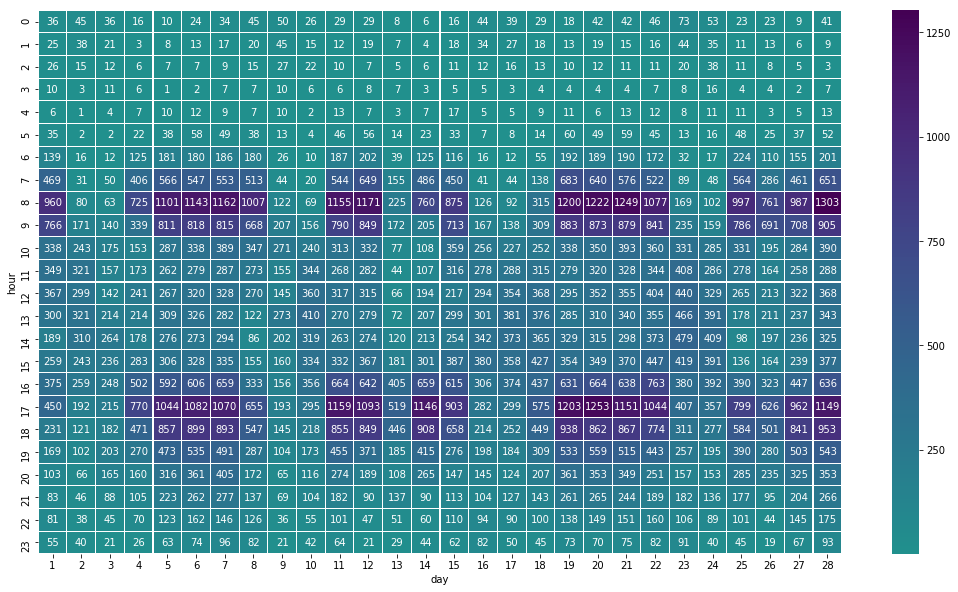

In [68]:
plt.figure(figsize = [18, 10])
sb.heatmap(hour_day,annot = True,cmap = 'viridis_r', center = 0, linewidth=.1,fmt='d');

As we can see from the plot above, the riders mostly rode at 08 hrs and 17 hrs and on these dates: 5th, 6th, 7th, 11th, 12th, 14th, 19th, 20th, 21st, 22nd and 28th. The highest trip in the month was made on 28th at 08 hrs

**Now, let us explore the days of the week most riders ride and at what hour?**

In [69]:
hour_dayName = df.groupby(['hour','day_name'],sort=False).size()
hour_dayName = hour_dayName.reset_index(name = 'count')
# print(hour_dayName)
hour_dayName = hour_dayName.pivot(index = 'hour', columns = 'day_name', values = 'count')

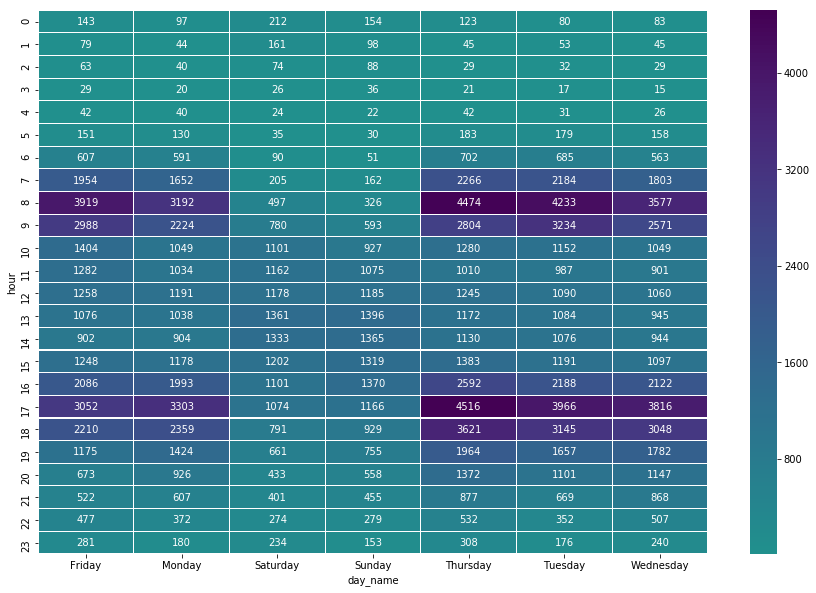

In [70]:
plt.figure(figsize = [15, 10])
sb.heatmap(hour_dayName,annot = True,cmap = 'viridis_r', center = 0, linewidth=.1,fmt='d');

As seen here, most of the trips were taken weekdays Monday to Friday with the most trip taken on Thursdays by 17 hrs.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I discovered the following:

- There is no correlation between participants' age and duration, distance travelled or speed of the rider.
- None of the customers shared their rides
- Younger participants shared their rides more than the older ones
- Subscribers and customers have approximately the same average age
- Those who did not share their rides travelled for a longer period than those who shared their rides
- Customers travelled for a longer time more than subscribers. This may be beccause none of the customers shared their rides. 
- Females and the other gender travelled longer than male gender.
- The highest trip in the month was made on 28th at 08 hrs
- Most of the trips were taken weekdays Monday to Friday with the most trip taken on Thursdays by 17 hrs.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I discovered that there is a little positive correlarion between distance travelled and speed. This means that riders who travelled longer distance tend to go faster than customers that rode within a short distance


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Let us remind ourselves of our variables and dataset


> I am interested in knowing the time (period) when riders usually take a ride, how long an average trip take and how the trip is affected based on the user type, age and gender.

In [71]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,distance_meters,speed_mps,day,day_name,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,No,35,544.708503,0.010438,28,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,47,2704.545131,0.043725,28,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,No,30,260.738544,0.007145,28,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,45,2409.301416,1.520064,28,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,60,3332.202628,1.858451,28,Thursday,23


##### M1: How does user type compare with member age and duration?

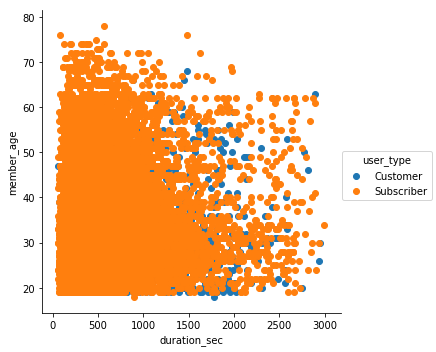

In [72]:
# Facetgrid of the member age and duration and user type
g = sb.FacetGrid(data = df.query('duration_sec<3000').sample(n=20000, replace = False),
                 hue = 'user_type', size = 5)
g.map(plt.scatter, 'duration_sec', 'member_age')
g.add_legend()

Here, we see that subscribers are far greater than customers. Most of the subscribers are between the ages of 20 and 60 and they rode between 100 and 1000 seconds.

##### M2: How does bike share compare with member age and duration?

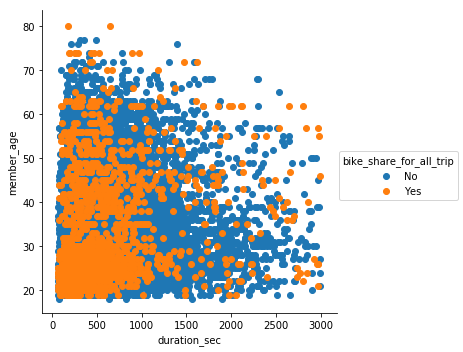

In [73]:
# Facetgrid of the member age and duration and bike share
g = sb.FacetGrid(data = df.query('duration_sec<3000').sample(n=20000, replace = False),
                 hue = 'bike_share_for_all_trip', size = 5)
g.map(plt.scatter, 'duration_sec', 'member_age')
g.add_legend()

Many of the participants did not share their rides and a few shared their rides. Those who shared their rides are younger and travelled for a shorter distance than those that did not share their rides.

##### M3: How does bike share and member gender compare with member age and duration?

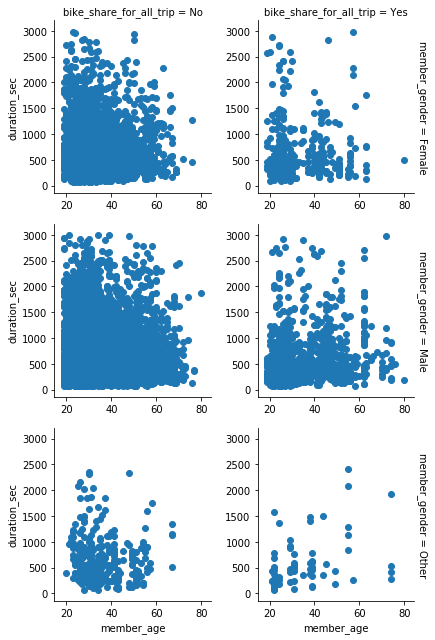

In [74]:
# Facetgrid of the member age and duration compared to bike share and gender
g = sb.FacetGrid(data = df.query('duration_sec<3000').sample(n=20000, replace = False),
                 col = 'bike_share_for_all_trip', row = 'member_gender', size = 3,
                margin_titles = True)
g.map(plt.scatter, 'member_age', 'duration_sec')

For each gender, the number of participants that shared their rides are less than the number that did not share their rides. Member age and gender did not indicate whether the participant shared their rides or rode for a longer period of time.

##### M4: How does distnace travelled and duration compare with member age?

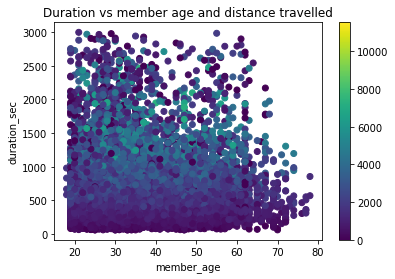

In [75]:
# Scatter plot of age, duration and distance travelled
plt.scatter(data = df.query('duration_sec < 3000').sample(20000), 
            x = 'member_age', y = 'duration_sec', c = 'distance_meters')
plt.colorbar()
label_chart('member_age','duration_sec','Duration vs member age and distance travelled')

The age of the participant does not affect the duration and the distance the participant travelled.

##### M5: How does user type compare with member age and member gender?

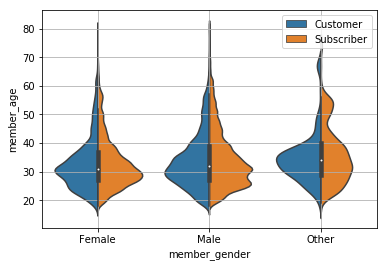

In [76]:
# Violin plot of age, gender and user type
sb.violinplot(data = df, x = 'member_gender',
              y = 'member_age',hue='user_type',split=True);
plt.legend(loc='best')
plt.grid()

Most of the female customers are in their early thirties while many of the female subscribers are in their late twenties. Both male customers and subscribers are within the same age range. On the contrary, customers of the other gender are older than subscribers of the other gender.

##### M6: How does user type compare with member age and bike share?

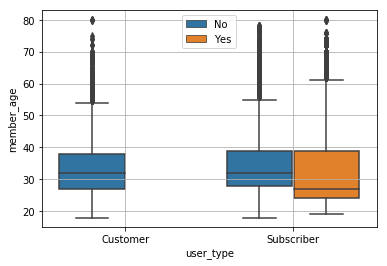

In [77]:
# Box plot of age, user type and bike share
sb.boxplot(data = df, x = 'user_type', y = 'member_age',
           hue='bike_share_for_all_trip');
plt.legend(loc='upper center')
plt.grid()

None of the customers shared their rides. Only some of the subscribers shared their rides. The median age of the subscribers who shared their rides is less than the median age of the subscribers that did not share their rides. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Here, we see that subscribers are far greater than customers. Most of the subscribers are between the ages of 20 and 60 and they rode between 100 and 1000 seconds.
- Many of the participants did not share their rides and a few shared their rides. Those who shared their rides are younger and travelled for a shorter distance than those that did not share their rides.
- The age of the participant does not affect the duration and the distance the participant travelled.
- Most of the female customers are in their early thirties while many of the female subscribers are in their late twenties. Both male customers and subscribers are within the same age range. On the contrary, customers of the other gender are older than subscribers of the other gender.
- None of the customers shared their rides. Only some of the subscribers shared their rides. The median age of the subscribers who shared their rides is less than the median age of the subscribers that did not share their rides. 

### Were there any interesting or surprising interactions between features?

- For each gender, the number of participants that shared their rides are less than the number that did not share their rides. Member age and gender did not indicate whether the participant shared their rides or rode for a longer period of time.

## Conclusions

> There are 183412 riders recorded in this dataset with 17 columns. After cleaning the dataset and we will be analyzing 174952 riders which represent 95% of the original dataset.

> The users are categorized as either `customer` or `subscriber`

> Three genders participated `male`, `female` and `other` and some participants shared their rides during the trip

> I was interested to find out when are most trips taken in terms of time of day, day of the week, or month of the year? How long does the average trip take? Does the above depend on if a user is a subscriber or customer? And how the trip is affected based on the user type, age and gender.

After my analysis, I found out the following:

- The Ford GoBike Share was held in February 2019. Of the days of the month, day 28 at 08hrs had the highest number of participants. Similarly, most of the trips was taken on Thursdays at 17 hrs. Of all the days of the week, Saturdays and Sundays had the least number of participants and more participants turned up on weekdays.

- An average trip takes between 400 to 900 seconds with all the participants taking an average of 704 seconds. However, we saw that customers travelled for a longer time more than subscribers. This may be because none of the customers shared their rides. Although only 10% of the participants shared their rides, many of the subscribers travelled a shorter distance.

- Most of the participants are between the ages of 25 and 35. A great number of the participants are `male` which represents `75%` of the data. Of all the participants, most are `subscribers` while `10%` of the participants shared their rides throughout the trip.

- There is no correlation between participants' age and duration, distance travelled or speed of the rider.

- Younger participants shared their rides more than the older ones

- Those who did not share their rides travelled for a longer period than those who shared their rides

- Customers travelled for a longer time more than subscribers. This may be because none of the customers shared their rides.
